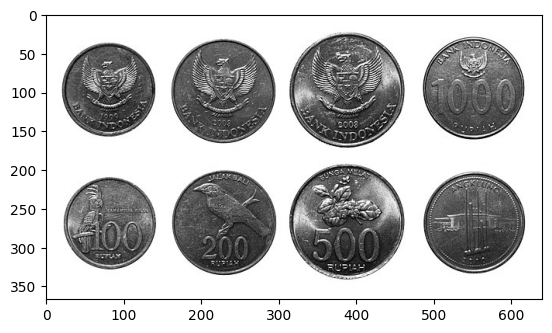

In [230]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


PATH = 'images/objects/shapes.jpg'


def cv2_imshow(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)


img = cv2.imread(PATH)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray)

Fungsi threshold menggunakan binary threshold sehingga hanya ada 2 warna, 0 atau max value.

Pixel dengan nilai di bawah threshold (ex: 200) otomatis berubah menjadi hitam (0), sedangkan di atas threshold otomatis menjadi max value. Dalam code di bawah menjadi putih (255).

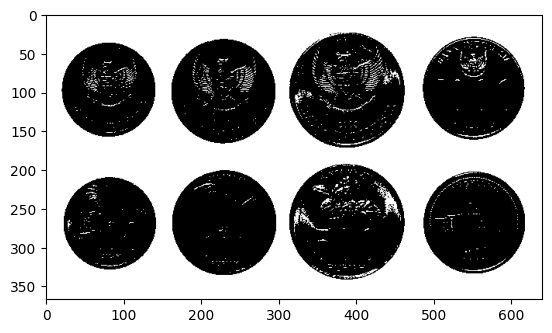

In [240]:
THRESHOLD_VALUE = 200
WHITE = 255

ret, thresh = cv2.threshold(gray, THRESHOLD_VALUE, WHITE,
                            cv2.THRESH_BINARY)
cv2_imshow(thresh)

number of contours detected: 8


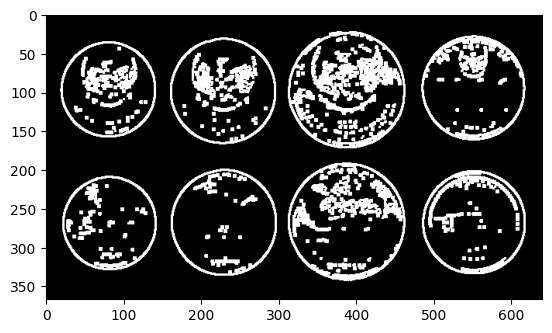

In [241]:
canny = cv2.Canny(thresh, 10, 240)

kernel = np.ones((3, 3), np.uint8)
morph = cv2.morphologyEx(canny, cv2.MORPH_DILATE, kernel, iterations=1)
cv2_imshow(morph)

# chain_approx_simple := only store coordinates in the corner to save memory
contours, hierarchy = cv2.findContours(morph, cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_SIMPLE)

print('number of contours detected:', len(contours))

Hasil gambar contour menggunakan approxPolyDP tidak sebagus dengan gambar di teknik menghitung coin yang tanpa approxPolyDP.

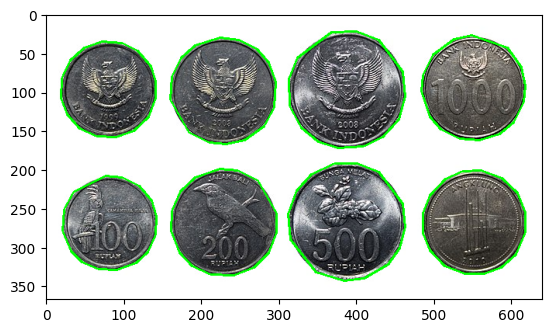

In [242]:
GREEN = (0, 255, 0)
THICKNESS = 2

for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01*cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, GREEN, THICKNESS)

cv2_imshow(img)